In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

In [2]:
portugal = gpd.read_file('shapes/gadm36_PRT_1.shp')
portugal = portugal.drop([1,12])
portugal

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,PRT,Portugal,PRT.1_1,Aveiro,None,None,Distrito,District,01,PT.AV,"MULTIPOLYGON (((-8.68208 40.69458, -8.68208 40..."
2,PRT,Portugal,PRT.3_1,Beja,None,None,Distrito,District,02,PT.BE,"MULTIPOLYGON (((-8.79264 37.71875, -8.79264 37..."
3,PRT,Portugal,PRT.4_1,Braga,None,None,Distrito,District,03,PT.BR,"POLYGON ((-8.22330 41.40873, -8.22311 41.40870..."
4,PRT,Portugal,PRT.5_1,Bragança,Braganza,None,Distrito,District,04,PT.BA,"POLYGON ((-7.22189 41.13609, -7.22259 41.13617..."
5,PRT,Portugal,PRT.6_1,Castelo Branco,None,None,Distrito,District,05,PT.CB,"POLYGON ((-8.16387 39.62655, -8.16429 39.62669..."
6,PRT,Portugal,PRT.7_1,Coimbra,None,None,Distrito,District,06,PT.CO,"POLYGON ((-8.78575 40.03485, -8.78583 40.03475..."
7,PRT,Portugal,PRT.8_1,Évora,None,None,Distrito,District,None,PT.EV,"POLYGON ((-7.15883 38.27951, -7.15872 38.27949..."
8,PRT,Portugal,PRT.9_1,Faro,None,None,Distrito,District,08,PT.FA,"MULTIPOLYGON (((-7.88042 36.97347, -7.88042 36..."
9,PRT,Portugal,PRT.10_1,Guarda,None,None,Distrito,District,09,PT.GU,"MULTIPOLYGON (((-7.43023 40.89533, -7.43020 40..."
10,PRT,Portugal,PRT.11_1,Leiria,None,None,Distrito,District,None,PT.LE,"MULTIPOLYGON (((-9.54458 39.47486, -9.54458 39..."


In [27]:
df = pd.read_csv("aves2018-GBIF.csv", sep='\t')
count = (df.stateProvince.value_counts()).reset_index(name='count')
perc = (df.stateProvince.value_counts(normalize=True).mul(100).round(1)).reset_index(name='perc')

/home/joaoalves/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (10,14,18,39,40,43,48) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [28]:
merged = portugal.merge(count, left_on='NAME_1', right_on='index')
merged = merged.merge(perc, left_on='NAME_1', right_on='index')
merged.head()

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry,index_x,count,index_y,perc
0,PRT,Portugal,PRT.1_1,Aveiro,None,None,Distrito,District,01,PT.AV,"MULTIPOLYGON (((-8.68208 40.69458, -8.68208 40...",Aveiro,44383,Aveiro,6.2
1,PRT,Portugal,PRT.3_1,Beja,None,None,Distrito,District,02,PT.BE,"MULTIPOLYGON (((-8.79264 37.71875, -8.79264 37...",Beja,47665,Beja,6.6
2,PRT,Portugal,PRT.4_1,Braga,None,None,Distrito,District,03,PT.BR,"POLYGON ((-8.22330 41.40873, -8.22311 41.40870...",Braga,17330,Braga,2.4
3,PRT,Portugal,PRT.5_1,Bragança,Braganza,None,Distrito,District,04,PT.BA,"POLYGON ((-7.22189 41.13609, -7.22259 41.13617...",Bragança,18223,Bragança,2.5
4,PRT,Portugal,PRT.6_1,Castelo Branco,None,None,Distrito,District,05,PT.CB,"POLYGON ((-8.16387 39.62655, -8.16429 39.62669...",Castelo Branco,12715,Castelo Branco,1.8


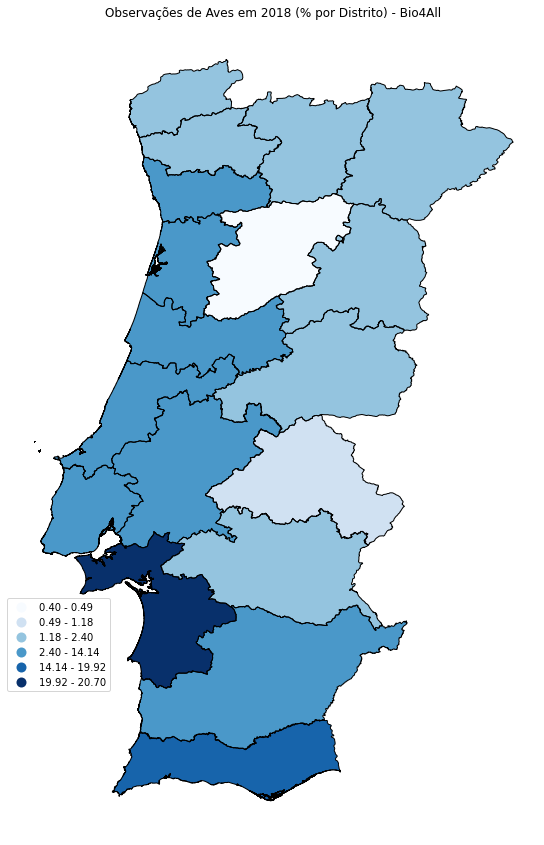

In [7]:
fig,ax = plt.subplots(figsize=(15,15))
ax.set_axis_off()
merged.boundary.plot(ax = ax, color = 'black',linewidth=1)
merged.plot(ax = ax,column='perc',cmap='Blues',scheme='percentiles',k=10,legend=True)
plt.title('Observações de Aves em 2018 (% por Distrito) - Bio4All')
ax.get_legend().set_bbox_to_anchor((.2, .3))
plt.savefig('PercObsAves2018Bio4All.png', bbox_inches='tight')

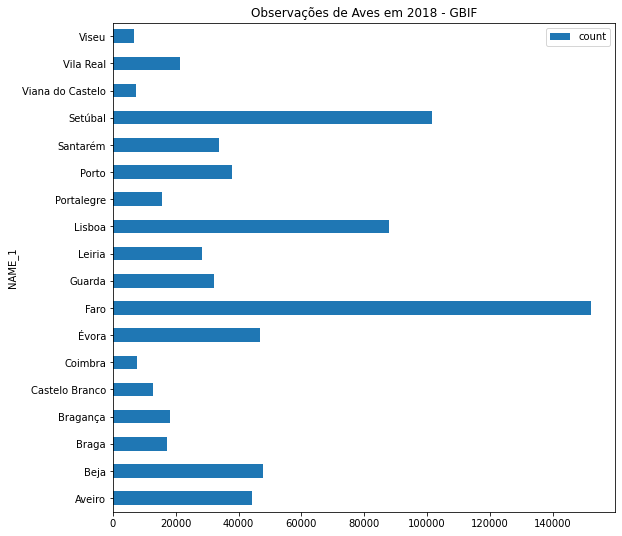

In [29]:
fig, ax = plt.subplots(figsize=(9,9))
pd.DataFrame(merged).plot.barh(ax=ax,x='NAME_1',y='count')
plt.title('Observações de Aves em 2018 - GBIF')
plt.savefig('HBarObsAves2018GBIF.png', bbox_inches='tight')